In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
path = r'/Users/artoe/Documents/DataAnalytics/Machine Learning with Python/Achievement 1/data'

In [3]:
weather = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [4]:
weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [5]:
pleasantweather = pd.read_csv(os.path.join(path, 'Pleasant_Weather.csv'), index_col = False)

In [6]:
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#create subset of unscaled data to use
df = weather[['DATE', 'MONTH', 'BASEL_precipitation','BASEL_sunshine','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',
                    'BELGRADE_precipitation','BELGRADE_sunshine','BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
                    'BUDAPEST_precipitation','BUDAPEST_sunshine','BUDAPEST_temp_mean','BUDAPEST_temp_min','BUDAPEST_temp_max',
                    'DEBILT_precipitation','DEBILT_sunshine','DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
                    'DUSSELDORF_precipitation','DUSSELDORF_sunshine','DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
                    'HEATHROW_precipitation','HEATHROW_sunshine','HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
                    'KASSEL_precipitation','KASSEL_sunshine','KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
                    'LJUBLJANA_precipitation','LJUBLJANA_sunshine','LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
                    'MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
                    'MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
                    'MUNCHENB_precipitation','MUNCHENB_sunshine','MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
                    'OSLO_precipitation','OSLO_sunshine','OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
                    'SONNBLICK_precipitation','SONNBLICK_sunshine','SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
                    'STOCKHOLM_precipitation','STOCKHOLM_sunshine','STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
                    'VALENTIA_precipitation','VALENTIA_sunshine','VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']]

In [8]:
#create X and y data by dropping date and month columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [9]:
print(X.shape)
print(y.shape)

(22950, 75)
(22950, 15)


In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 75)
(5738, 75)
(17212, 15)
(5738, 15)


In [12]:
X_train[:10]

,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,...,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,0.06,6.9,20.4,13.6,26.9,0.00,8.5,22.5,16.2,28.6,...,0.00,7.2,8.5,5.0,11.9,0.28,2.1,15.6,13.7,17.6
20472,0.09,0.0,-1.8,-3.2,-0.5,0.00,7.7,-3.6,-6.0,0.1,...,0.00,1.4,-6.9,-9.4,-4.6,0.41,3.4,10.7,7.9,13.5
18269,0.07,0.6,-1.8,-6.0,0.7,0.21,0.5,3.2,1.6,6.7,...,0.03,0.9,-8.3,-13.3,-5.5,0.03,3.2,1.0,-3.9,5.9
7713,0.00,3.5,-1.4,-3.8,2.1,0.01,0.0,0.7,0.3,2.5,...,0.02,0.0,-2.2,-5.2,-1.5,1.58,0.0,6.8,5.5,9.6
21958,1.18,0.5,6.1,1.8,13.5,0.01,4.5,6.7,1.7,11.7,...,0.00,8.5,1.0,-0.6,3.5,0.41,3.4,10.7,7.9,13.5
11464,0.00,10.1,18.3,10.6,24.1,0.00,8.4,18.7,14.7,24.0,...,0.70,2.2,10.0,7.7,15.6,0.00,12.5,13.1,9.0,16.9
3984,0.00,3.6,3.7,-0.5,6.3,0.00,0.0,4.4,3.4,5.0,...,0.89,4.1,1.1,0.0,2.6,0.03,3.2,10.9,9.3,12.5
4752,0.00,0.0,-3.9,-7.4,-1.6,0.27,0.0,0.5,0.0,1.7,...,0.00,0.7,1.3,-1.2,3.0,0.00,0.0,10.5,9.7,11.4
11092,0.50,5.5,15.7,11.2,22.4,0.00,8.6,21.3,14.1,26.9,...,0.00,5.0,11.9,8.6,15.8,0.77,3.4,12.6,9.5,15.8
21377,0.00,13.5,18.8,9.9,26.0,0.05,5.7,23.6,20.1,27.2,...,0.00,16.1,20.0,14.2,26.4,0.41,3.4,10.7,7.9,13.5


In [13]:
#Assign the data to DataFrames
X_train_df = pd.DataFrame(X_train, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test, index=X_test.index, columns=X_test.columns)

In [14]:
#Create the ANN with 5 layers of 5 nodes each
mlp = MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=500)

In [15]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.45282361143388333
0.45189961659114675


C:\Users\artoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


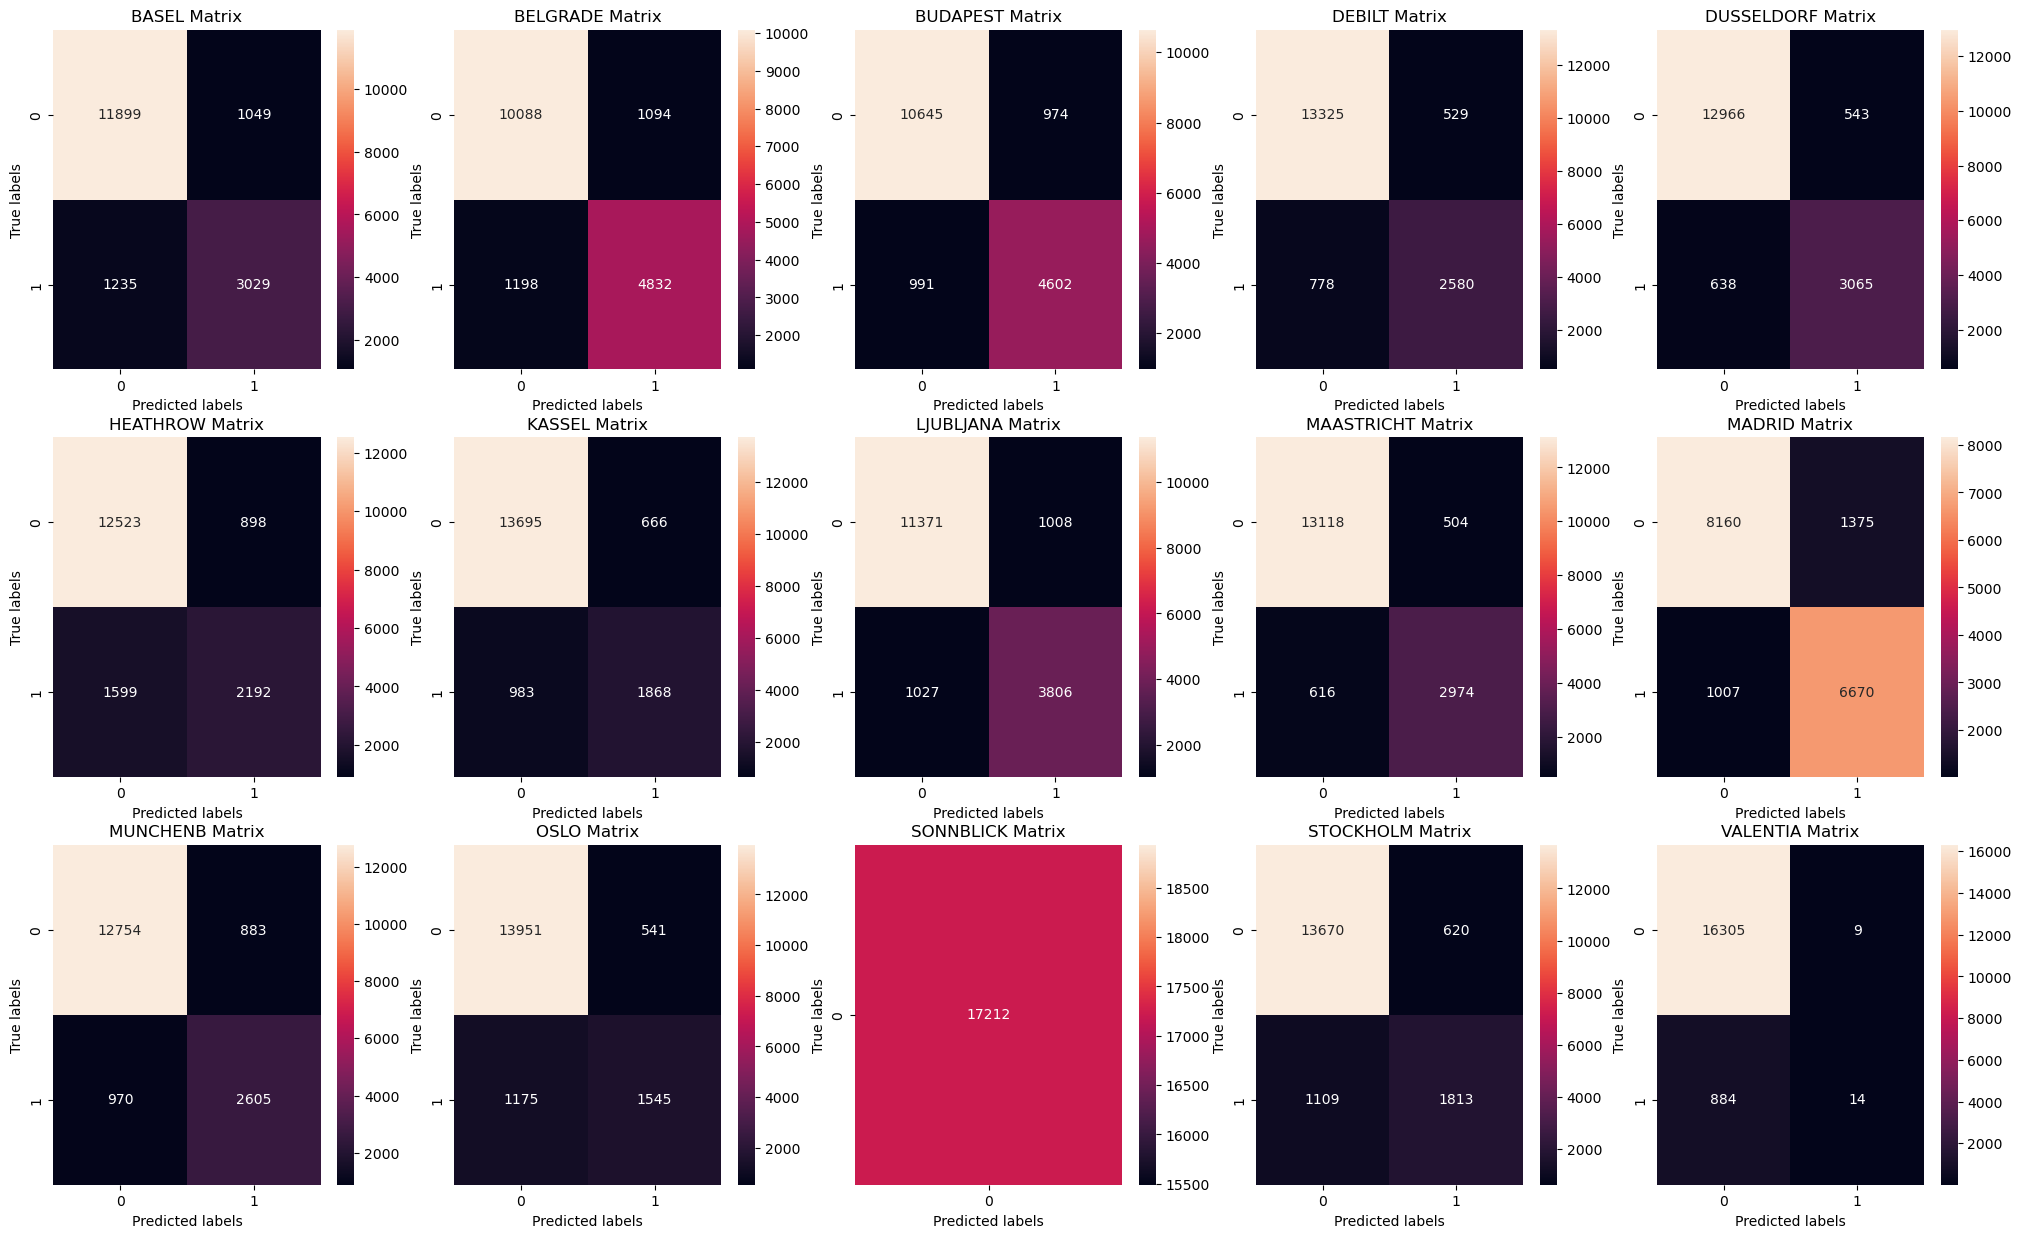

In [16]:
#Confusion matrix based on last k in sequence (training data). 
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

C:\Users\artoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


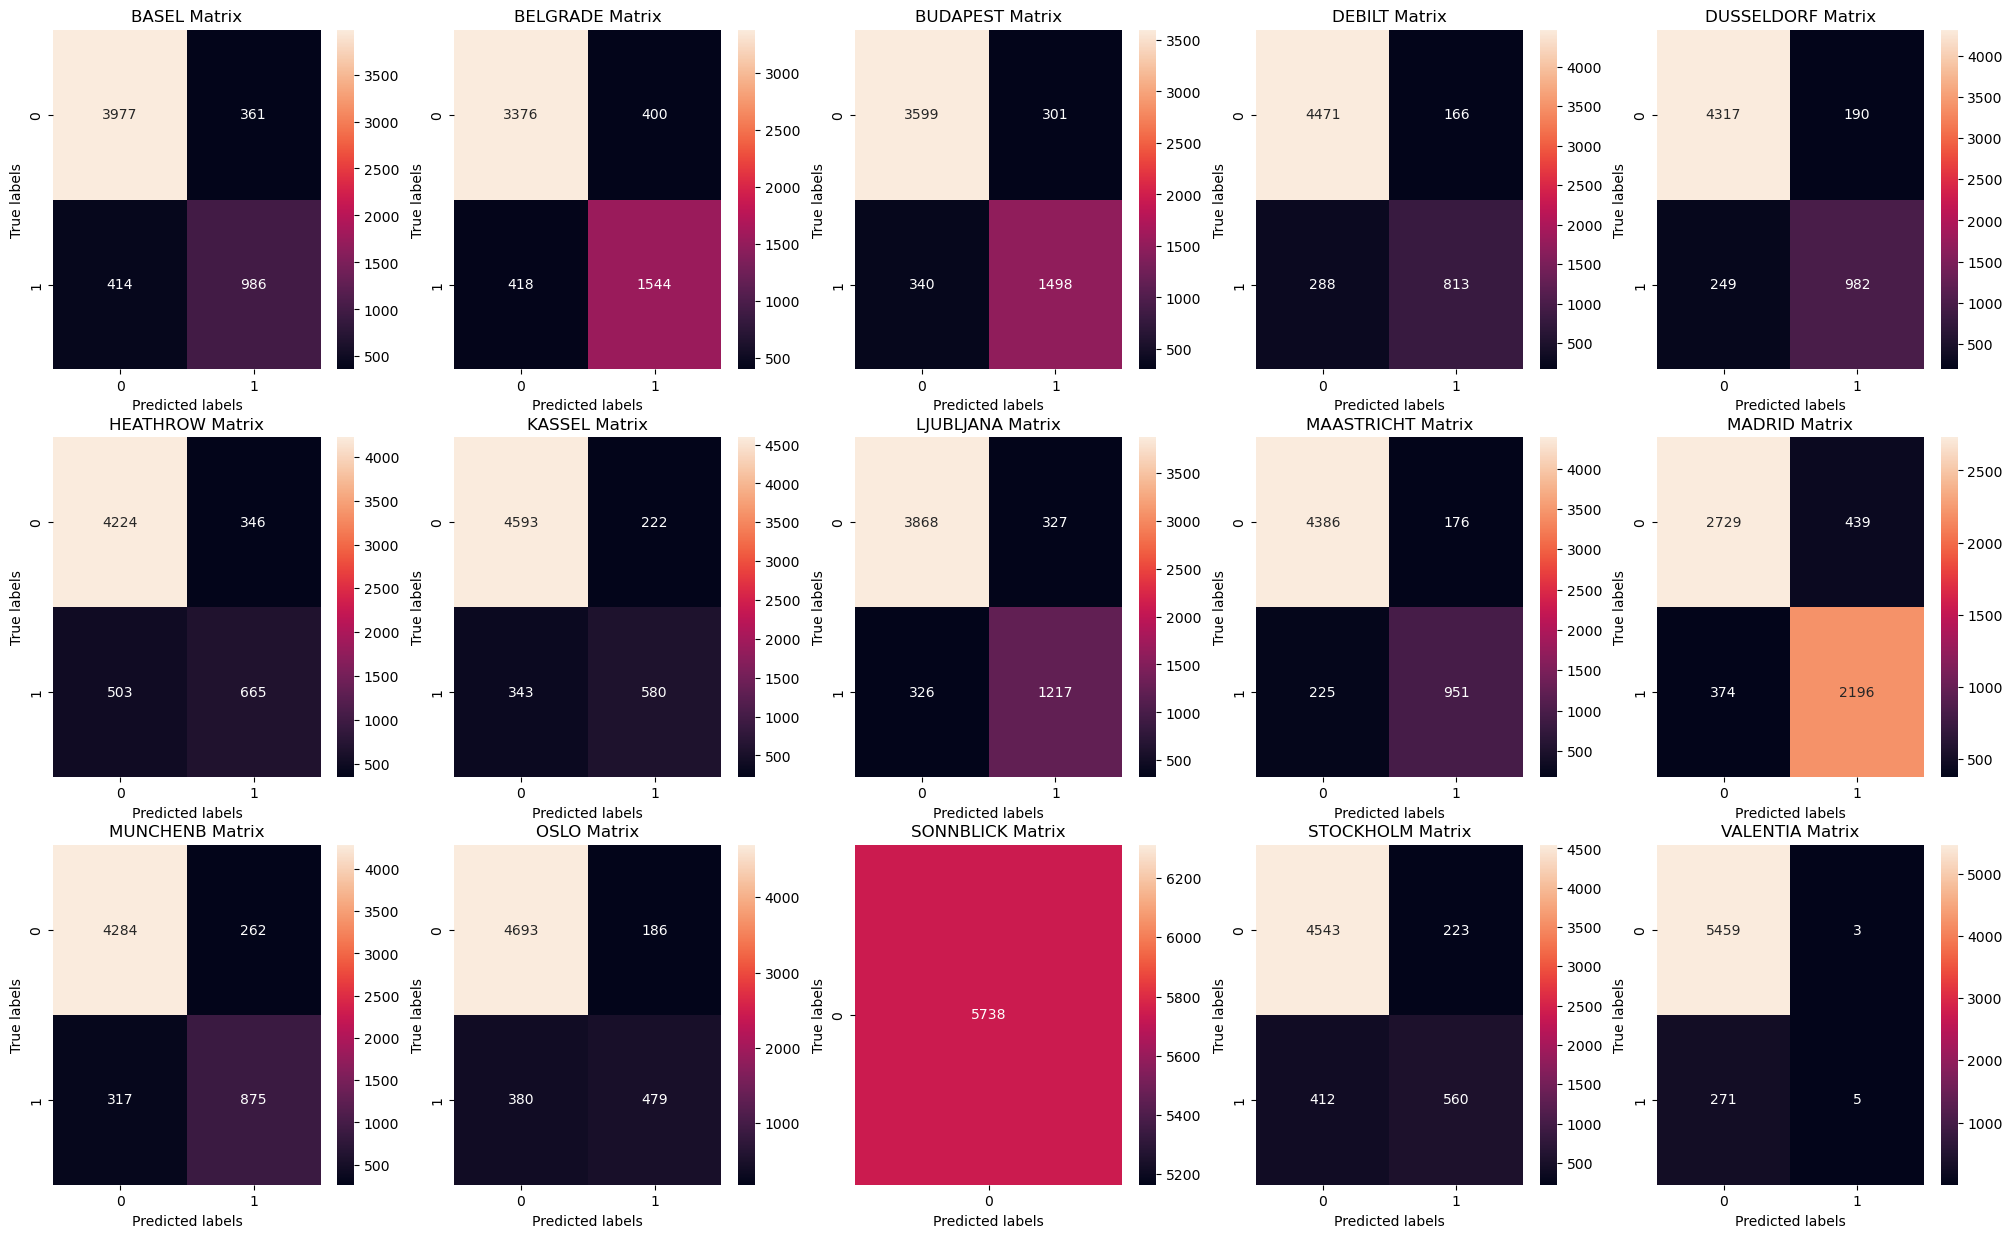

In [17]:
#Confusion matrix based on last k in sequence (testing data). 
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

#### The ANN needs to be much more complex. We can try 3 layers with larger numbers of nodes each.

In [19]:
#Create the ANN with 3 layers of 100, 50 and 50 nodes each. Increase max iterations to 1000.
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=1000)

In [20]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6234603764815245
0.5383408853258975


C:\Users\artoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


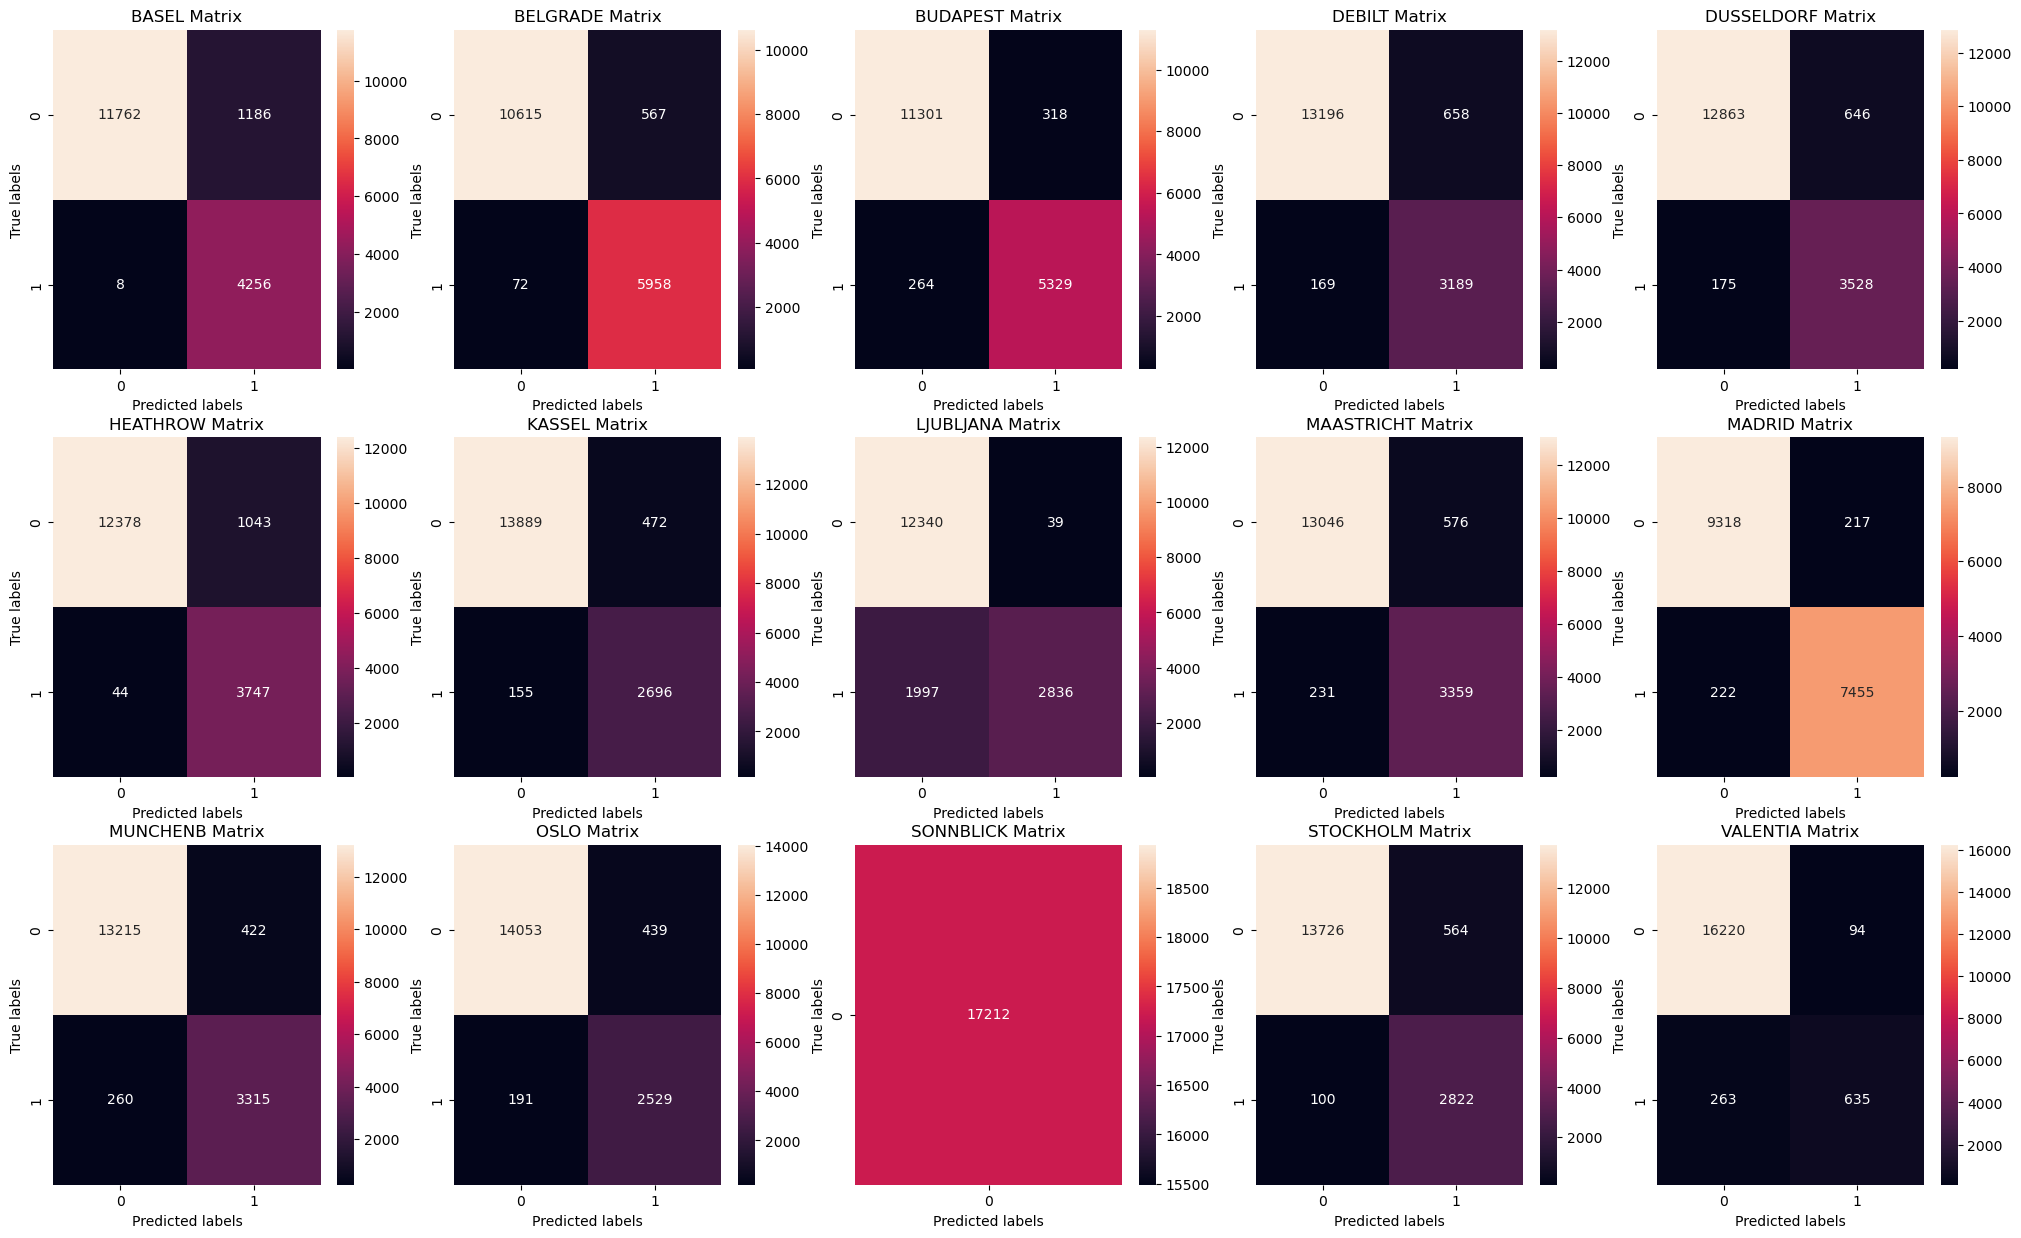

In [21]:
#Confusion matrix based on last k in sequence (training data). 
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

C:\Users\artoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


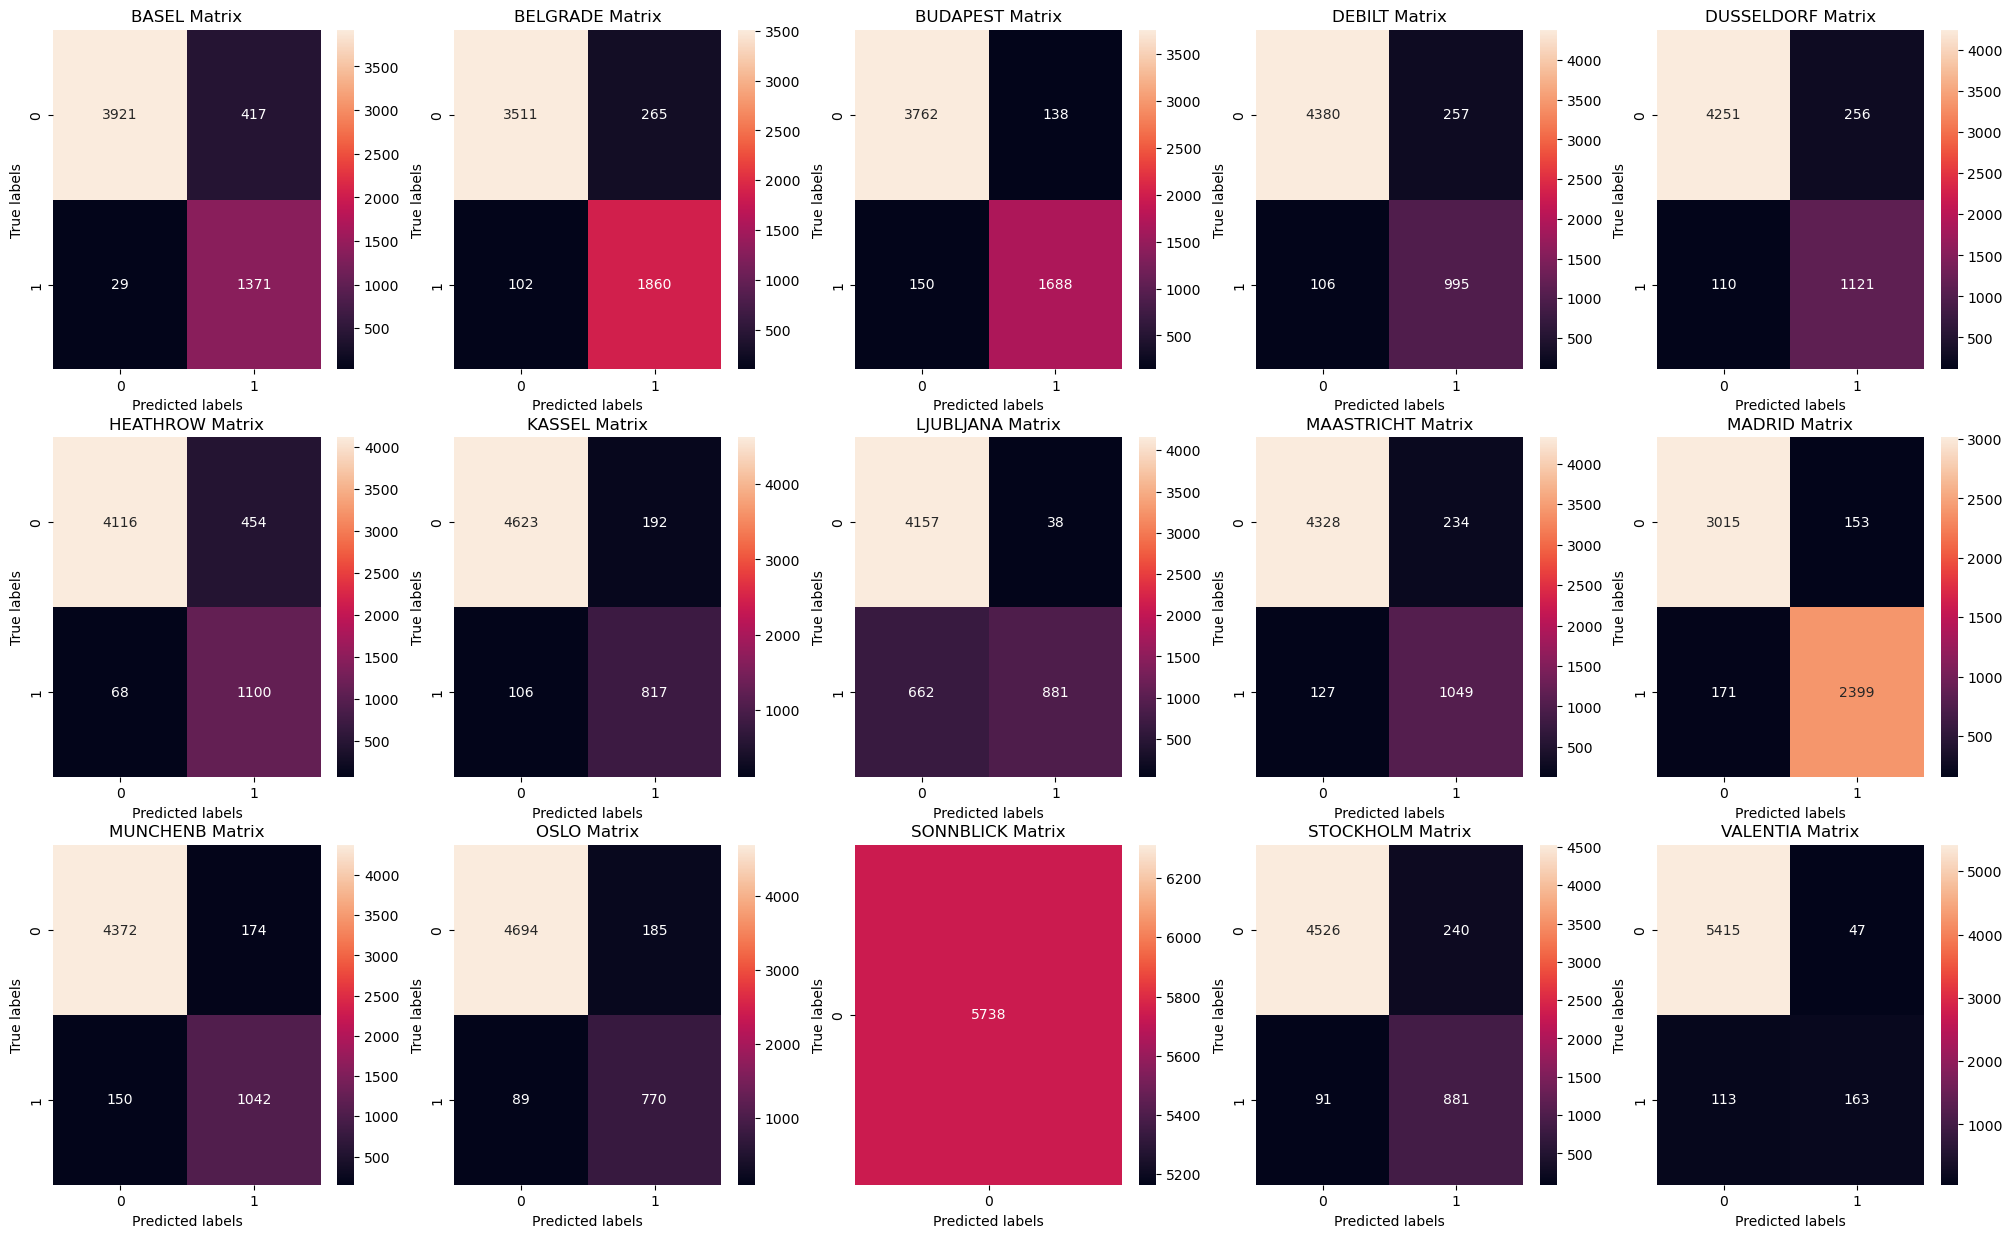

In [22]:
#Confusion matrix based on last k in sequence (testing data). 
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

#### Still could be more accurate. We can add more nodes to the layers.

In [24]:
#Create the ANN with 3 layers of 500, 250 and 250 nodes each. Increase max iterations to 1000.
mlp = MLPClassifier(hidden_layer_sizes=(500, 250, 250), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(500, 250, 250), max_iter=1000)

In [25]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.8508017662096212
0.5121993726036946


C:\Users\artoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


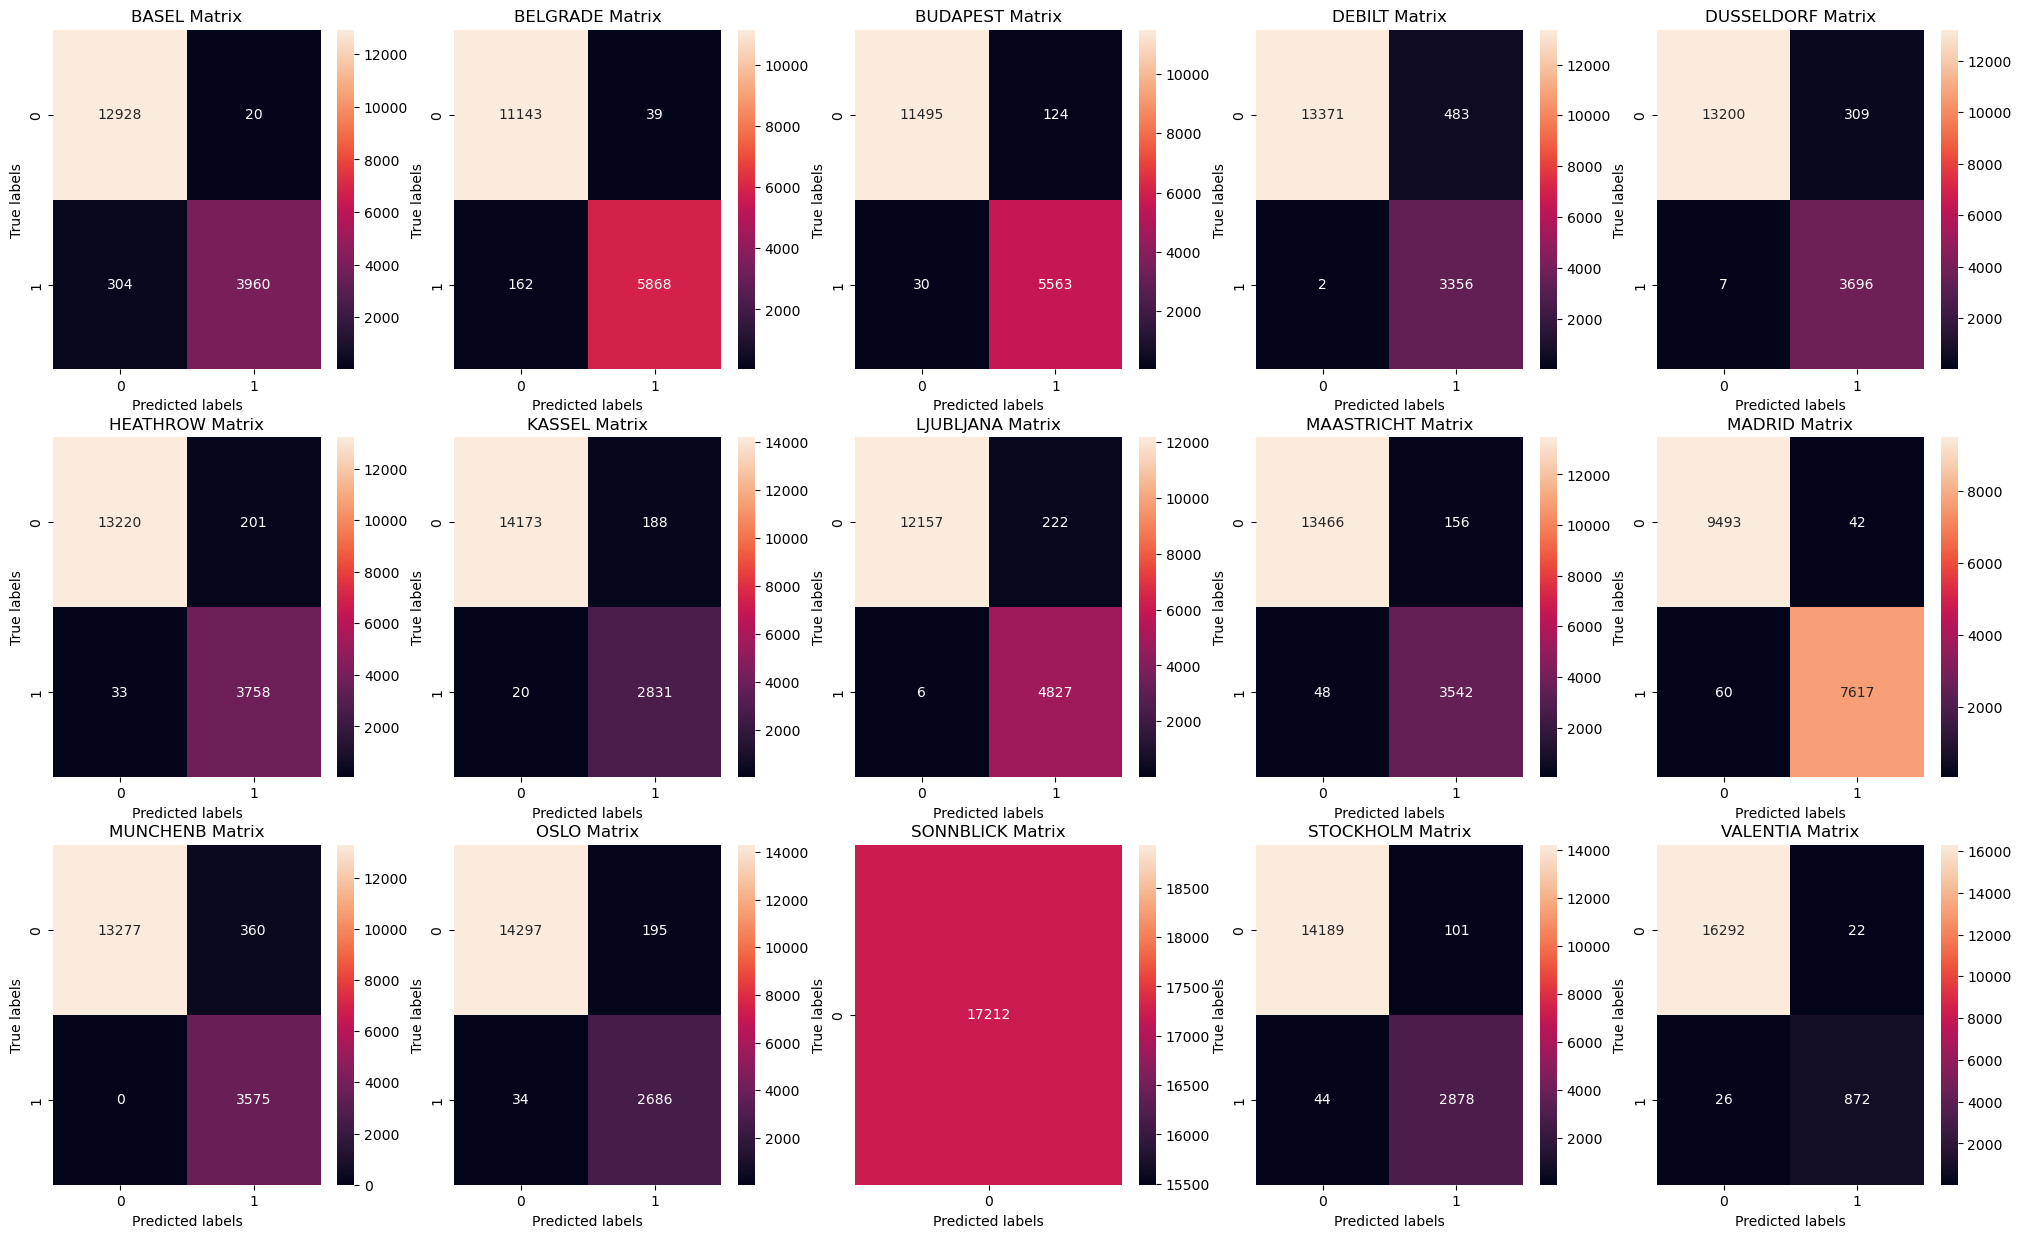

In [26]:
#Confusion matrix based on last k in sequence (training data). 
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

C:\Users\artoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


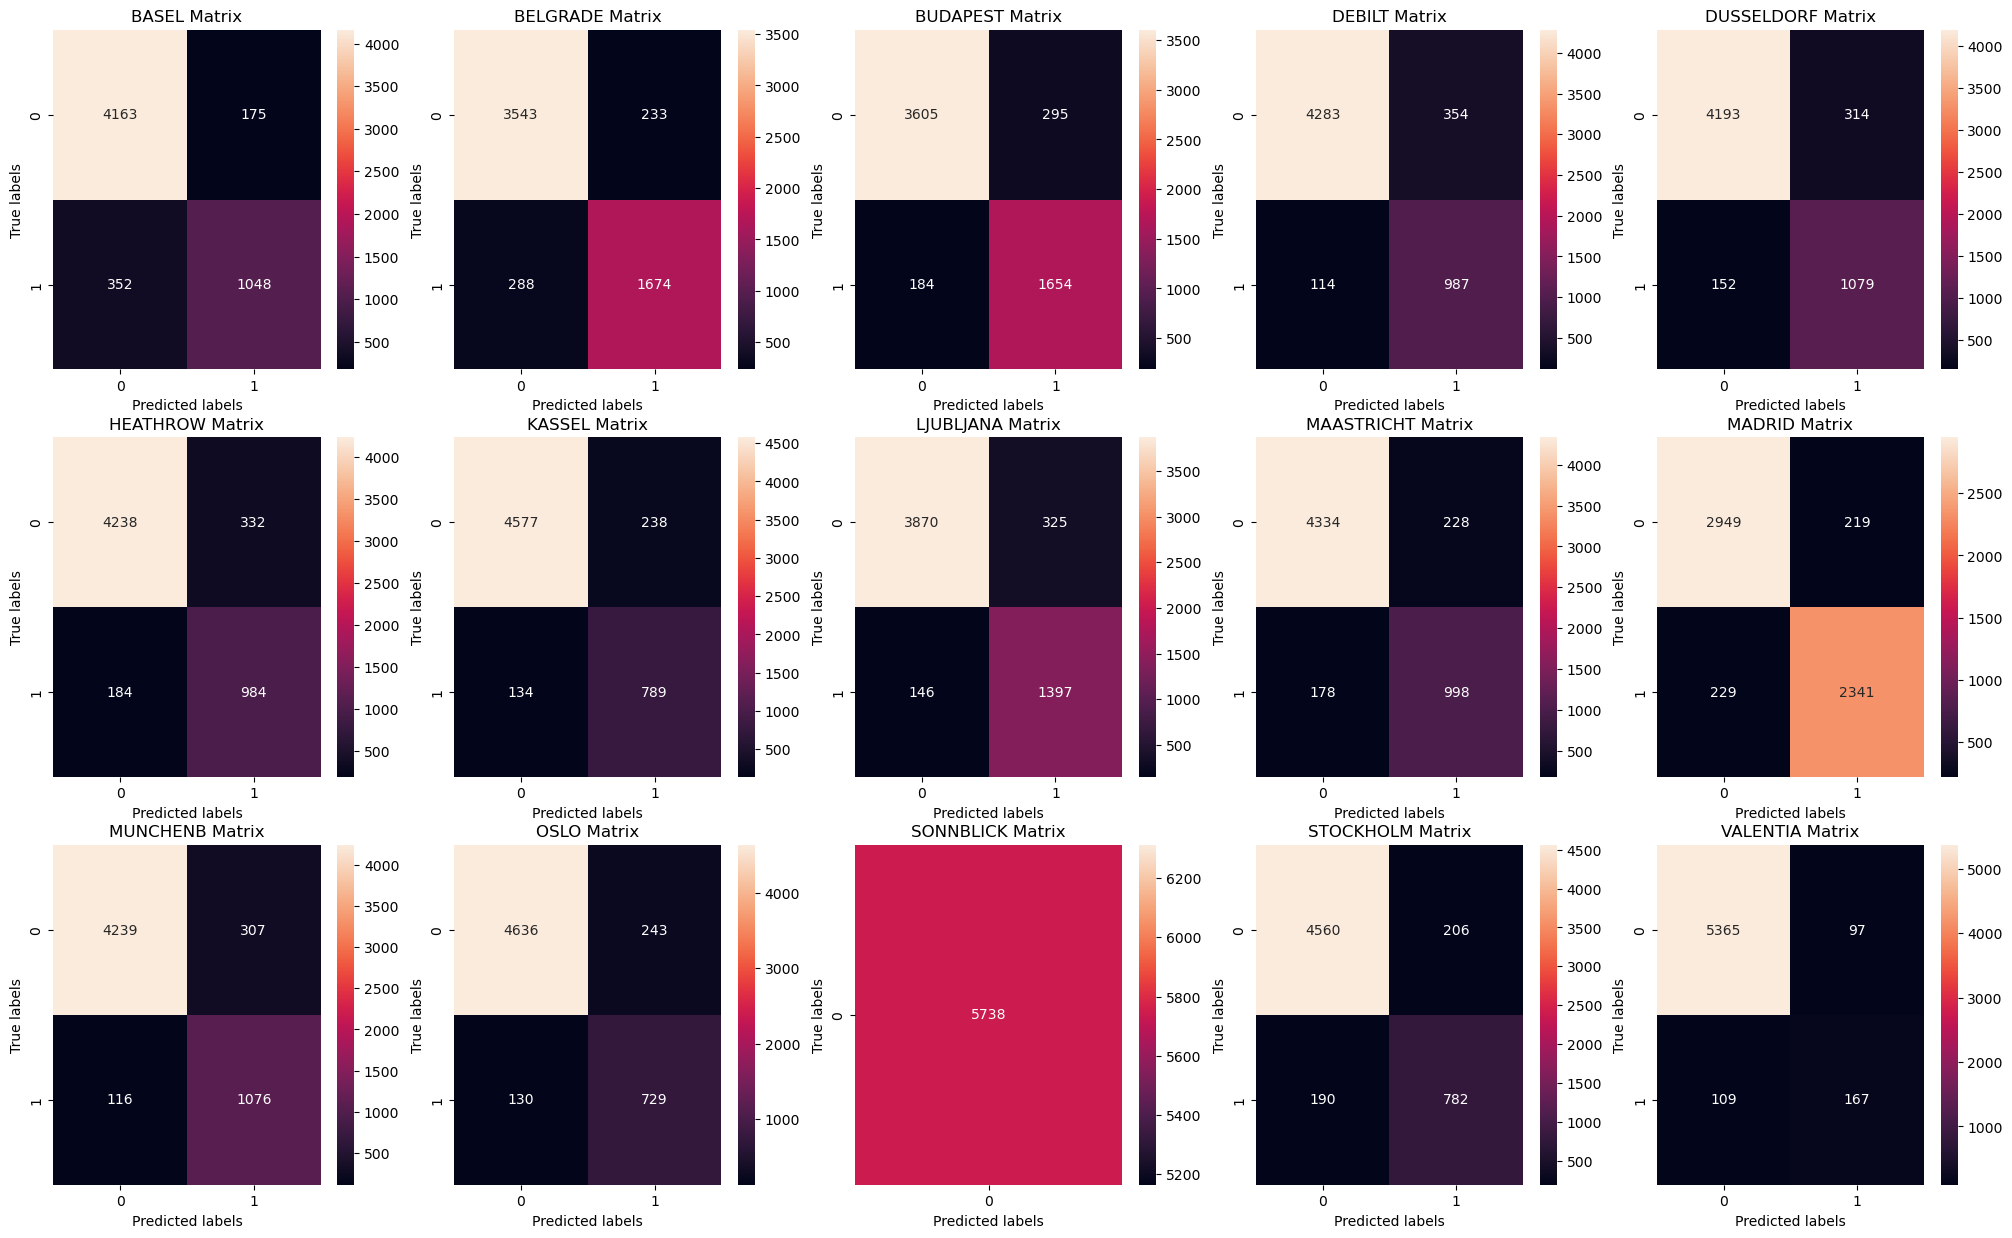

In [27]:
#Confusion matrix based on last k in sequence (testing data). 
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

##### This model performs with 97% accuracy with the training data, but 50% (less than the previous model) with the test data. This is likely due to overfitting. 
##### Trying another model with half the number of nodes per layer.

In [30]:
#Create the ANN with 3 layers of 250, 125 and 125 nodes each. Increase max iterations to 1000.
mlp = MLPClassifier(hidden_layer_sizes=(250, 125, 125), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(250, 125, 125), max_iter=1000)

In [31]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7782942133395305
0.5322411990240502
